In [54]:
import numpy as np
import matplotlib.pyplot as plt

# Problem 1

## 1

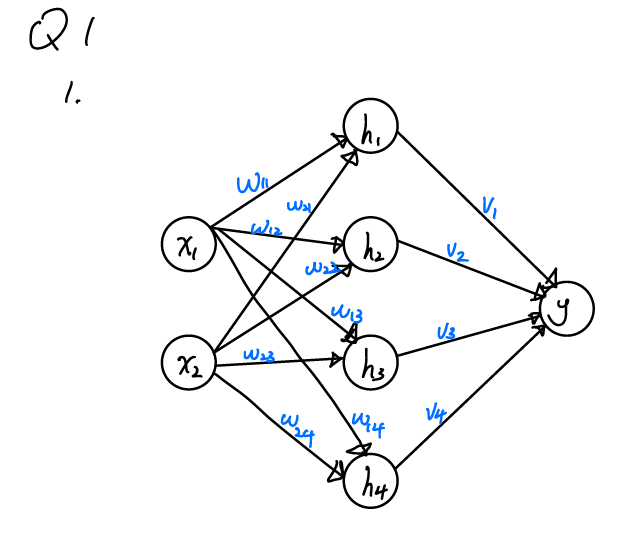

## 2

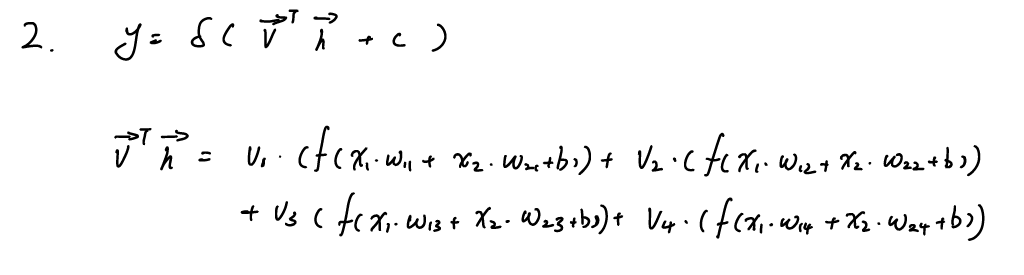

## 3

In [49]:
def relu(z):
    return np.where(z>0,z,0)

def ff_nn_ReLu(X, W, b, V, C, f=relu):
    H = f(np.dot(X, W) + b)
    return np.dot(H,V) + C

def sigmoid(z):
    return 1/(1 + np.exp(-z))

## 4

In [50]:
w = [
    [1,-1,0,1],
    [0,0,0.5,1]
]

b = [0,0,1,0]

v = [1,0,-1,1]

c = [1]

x = [
    [1,-1],
    [0,-1],
    [0,1]
]

In [53]:
z = ff_nn_ReLu(x,w,b,v,c)
y_hat = sigmoid(z)
y_hat

array([0.81757448, 0.62245933, 0.62245933])

# Problem 2

## 1

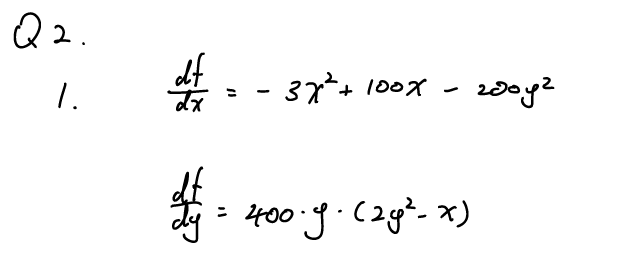

## 2

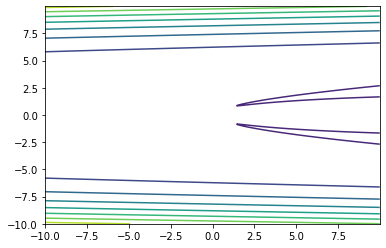

In [73]:
delta = 0.025
x = np.arange(-10.0, 10.0, delta)
y = np.arange(-10.0, 10.0, delta)
X, Y = np.meshgrid(x, y)
Z = (3-X**3)+50*((2*(Y**2)-X)**2)
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)

## 3

In [96]:
def grad_f(vector):
    x, y = vector
    df_dx = -3*(x**2) + 100*x - 200*(y**2)
    df_dy = 400*y*(2*(y**2) - x)
    return np.array([df_dx, df_dy])


def grad_descent(starting_point=None, iterations=10, learning_rate=2):
    if starting_point is None:
        starting_point = np.random.uniform(-5,5,size=2)
    
    point = starting_point
    output = [point]
    for i in range(iterations):
        point = point - learning_rate * grad_f(point)
        output.append(point)
   
    return np.array(output)

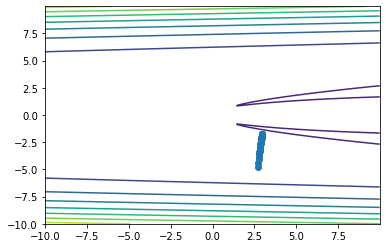

In [105]:
np.random.seed(10)
traj = grad_descent(iterations=50, learning_rate=0.000005)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

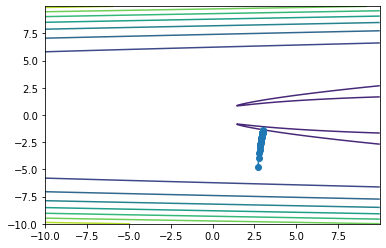

In [106]:
np.random.seed(10)
traj = grad_descent(iterations=50, learning_rate=0.00001)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

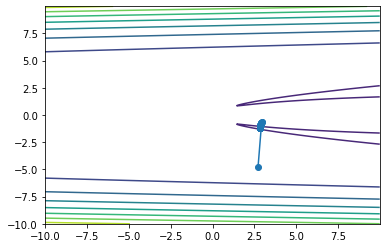

In [104]:
np.random.seed(10)
traj = grad_descent(iterations=50, learning_rate=0.00005)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

## 4

In [109]:
def grad_descent_with_momentum(starting_point=None, iterations=10, alpha=.9, epsilon=10):
    if starting_point is None:
        starting_point = np.random.uniform(-5,5,size=2)
    
    point = starting_point
    output = [point]
    v = np.array(point)
    
    for i in range(iterations):
        grad = grad_f(point)
        v = alpha*v + epsilon*grad
        point = point - v
        output.append(point)
   
    return np.array(output)

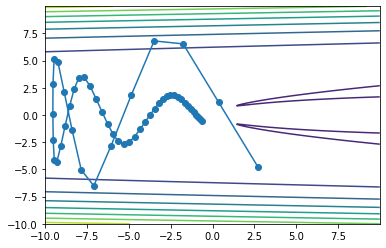

In [114]:
np.random.seed(10)
traj = grad_descent_with_momentum(iterations=50, alpha=.9, epsilon=0.00002)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

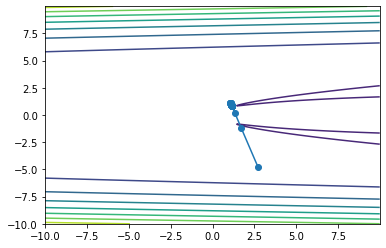

In [118]:
np.random.seed(10)
traj = grad_descent_with_momentum(iterations=50, alpha=.4, epsilon=0.00002)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

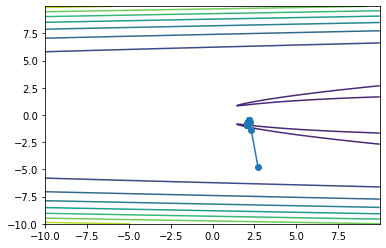

In [123]:
np.random.seed(10)
traj = grad_descent_with_momentum(iterations=50, alpha=.2, epsilon=0.00003)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

# Problem 3

## 1

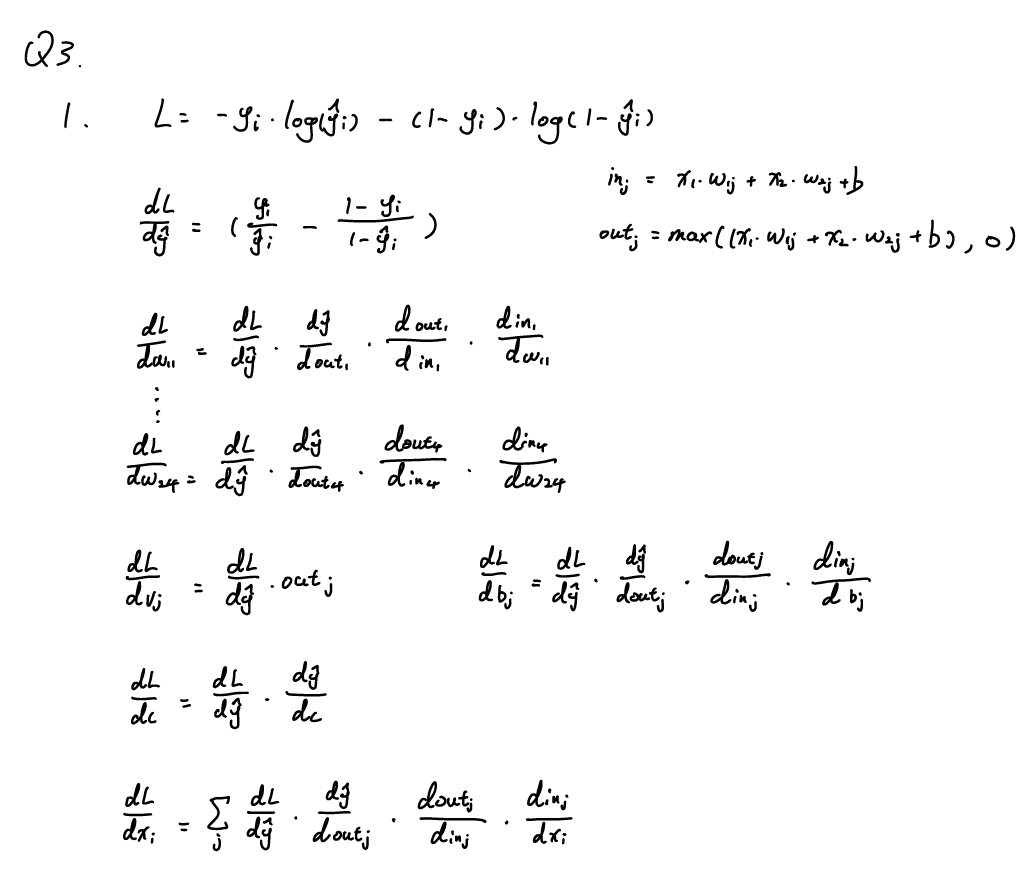

## 2

In [138]:
def loss(y,y_hat):
    return np.sum(- (y*np.log(y_hat) + (1-y)*np.log(1 - y_hat)))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def relu_derivative(x):
    return np.where(x>0, 1, 0)

def yhat(x, W, b, v, c):
    # returns model prediction 
    h = relu(np.dot(x,W) + b)
    y = sigmoid(np.dot(h,v) + c)
    return y

def binary_xent_residual(y, y_hat):
    return (y/y_hat - (1-y)/(1-y_hat))

def pack_params(param_vec):
    w_11, w_12, w_13, w_14, w_21, w_22, w_23, w_24, b_1, b_2, b_3, b_4, v_1, v_2, v_3, v_4, c = param_vec
    W = np.array([[w_11,w_12, w_13, w_14],[w_21,w_22, w_23, w_24]])
    b = np.array([b_1, b_2, b_3, b_4])
    v = np.array([v_1,v_2, v_3, v_4])
    c = np.array([c])
    return((W, b, v, c))
    return((W, b, v, c))

In [125]:
def grad_f(param_vec, x, y):
    W, b, v, c = pack_params(param_vec)
    
    a = np.dot(x,W)+b
    h = relu(a)
    y_a = np.dot(h,v)+c
    y_hat = sigmoid(y_a)
    
    dL_dc = binary_xent_residual(y, y_hat).dot( y_hat*(1-y_hat) )
    
    dL_dv = (binary_xent_residual(y, y_hat) * y_hat*(1-y_hat)).T.dot(h)
    
    dL_db = (binary_xent_residual(y, y_hat) * y_hat*(1-y_hat)).T.dot(relu_derivative(a))*v
  
    dL_dw = x.T.dot(np.expand_dims((binary_xent_residual(y, y_hat) * y_hat*(1-y_hat)),1).dot(np.expand_dims(v,1).T))
             
    
    return np.array([dL_dw[0,0], dL_dw[0,1], dL_dw[0,2], dL_dw[0,3], dL_dw[1,0], dL_dw[1,1], dL_dw[1,2], dL_dw[1,3]
                     , dL_db[0], dL_db[1], dL_db[2], dL_db[3], dL_dv[0], dL_dv[1], dL_dv[2], dL_dv[3], dL_dc]) / len(y) 

## 3

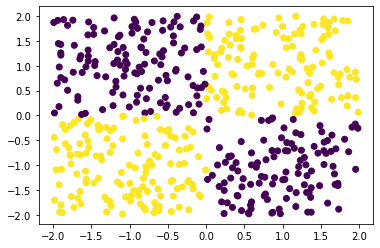

In [127]:
x = np.random.uniform(low=-2,high=2,size=1000).reshape((500,2))
y=np.zeros(500)
y[np.logical_and(x[:,0]>0 , x[:,1]>0)]=1
y[np.logical_and(x[:,0]<0 , x[:,1]<0)]=1
plt.scatter(x[:,0],x[:,1],c=y)

## 4

In [161]:
def grad_descent(x, y,  iterations=10, learning_rate=1e-2):
    point = np.array([w[0][0],w[0][1], w[0][2], w[0][3], w[1][0], w[1][1], w[1][2], w[1][3], b[0], b[1], b[2], b[3], v[0], v[1], v[2], v[3], c[0]])
    trajectory = [point]
    losses = [loss(y, yhat(x, *pack_params(point)))]
    
    for i in range(iterations):
        grad = grad_f(point, x, y)
        point = point + learning_rate * grad
        trajectory.append(point)
        losses.append(loss(y, yhat(x, *pack_params(point))))
    return (np.array(trajectory), losses)

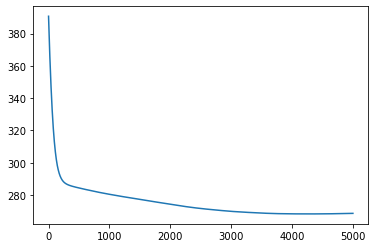

In [179]:
traj, losses = grad_descent(x, y, iterations=5000,learning_rate=0.01)
plt.plot(losses)

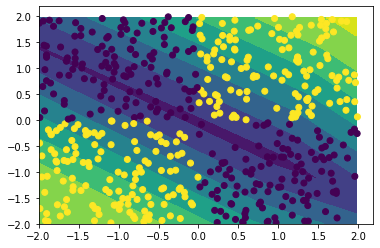

In [180]:
delta = 0.025
x1 = np.arange(-2.0, 2.0, delta)
x2 = np.arange(-2.0, 2.0, delta)
X1, X2 = np.meshgrid(x1, x2)
YHAT = yhat(np.array((X1.ravel(),X2.ravel())).T, *pack_params(traj[-1])).reshape((160,160))
fig, ax = plt.subplots()
CS = ax.contourf(X1, X2, YHAT)

plt.scatter(x[:,0],x[:,1],c=y)

## 5

In [168]:
def grad_descent_with_momentum(x, y, starting_point=None, iterations=10, alpha=.9, epsilon=10):
    if starting_point is None:
        starting_point = np.random.uniform(-1, 1, size=17)
 
    point = starting_point
    trajectory = [point]
    v = np.zeros(point.size)
    losses = [loss(y, yhat(x, *pack_params(point)))]

    for i in range(iterations):
        grad = grad_f(point, x, y)
        v = alpha * v + epsilon * grad
        point = point + v
        trajectory.append(point)
        losses.append(loss(y, yhat(x, *pack_params(point))))
  
    return (np.array(trajectory), losses)

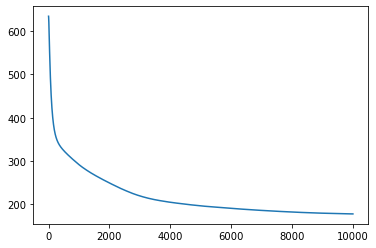

In [185]:
traj, losses = grad_descent_with_momentum(x, y, iterations = 10000, alpha =0.9, epsilon=.001)
plt.plot(losses)

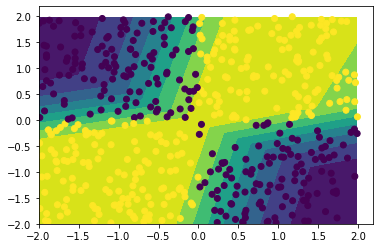

In [186]:
delta = 0.025
x1 = np.arange(-2.0, 2.0, delta)
x2 = np.arange(-2.0, 2.0, delta)
X1, X2 = np.meshgrid(x1, x2)
YHAT = yhat(np.array((X1.ravel(),X2.ravel())).T, *pack_params(traj[-1])).reshape((160,160))
fig, ax = plt.subplots()
CS = ax.contourf(X1, X2, YHAT)

plt.scatter(x[:,0],x[:,1],c=y)

#### Gradient desent with momentum converges more efficiently

## 6

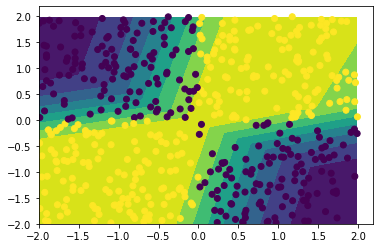

In [187]:
delta = 0.025
x1 = np.arange(-2.0, 2.0, delta)
x2 = np.arange(-2.0, 2.0, delta)
X1, X2 = np.meshgrid(x1, x2)
YHAT = yhat(np.array((X1.ravel(),X2.ravel())).T, *pack_params(traj[-1])).reshape((160,160))
fig, ax = plt.subplots()
CS = ax.contourf(X1, X2, YHAT)

plt.scatter(x[:,0],x[:,1],c=y)